In [120]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# The following is standard RK4. It calls a function f(x,y,k) where k is a paramter
def rk4(f, x, y, k,h):    
    k1 = h * f(x, y,k)
    k2 = h * f(x + h / 2, y + k1 / 2,k)
    k3 = h * f(x + h / 2, y + k2 / 2,k)
    k4 = h * f(x + h, y + k3,k)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def call_rk4(f,xlim,yini,k,N):
    
    y = yini
    x1,x2 = xlim
    xs,h = np.linspace(x1,x2,N,retstep=True)
    ys = np.zeros((N,len(yini)),dtype = np.float64)
    
    for i in range(N):
        x= xs[i]
        ys[i,:] = y
        
        y = rk4(f,x,y,k,h)             # for a given k value it gives xs and ys 
    return xs , ys

In [122]:
# for a particular k lets calculate the deviation from the original boundary condition


def dev(k,f,y_bound):
    xs , ys = call_rk4(f,xlim,yini,k,N)
    return ys[-1][0] - y_bound[1]    # taking the deviation  of position term in ys[-1][0]


In [123]:
def odef(x,y,k):
    return np.array([y[1], -k**2 * y[0]]) # here k is wavenumber in the unit of pi

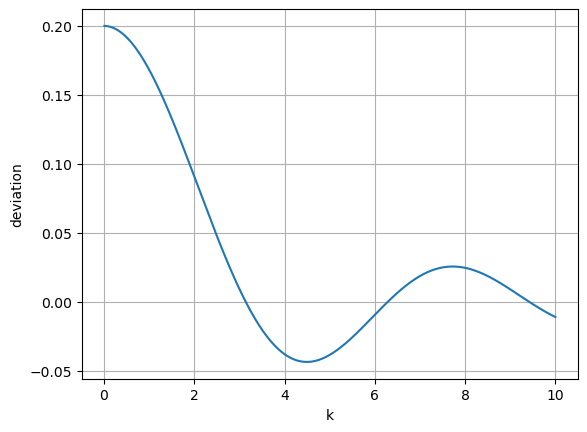

In [124]:
ks = np.linspace(0.01,10,500)
devs = [dev(i,odef,y_bound) for i in ks]

plt.plot(ks,devs)
plt.grid()
plt.xlabel("k")
plt.ylabel("deviation");

# that means htere are many  k that can have zero deviation (these are  different modes)

In [131]:
xlim = [0. , 1.]

yini = [0. , 0.2]   # here yini[1] which is slope is just a guess

y_bound = [0.0 , 0.0 ]   # boundary conditions at the end of box

N = 200

max_iter = 50
tol = 10e-6

In [132]:
# lets find the k value such that  boundary conditions are statisfied it can be done in many ways so many k values are possible

# This is an implementation of the secant method used for finding the root of the function dev. 
def secant(k_guess,f,method,ybound):           # method is a function calculating the deviation and we are finding its zeros.
    k1, k2 = k_guess
    iter = 0
    while abs(method(k2,f,ybound))>tol and iter<max_iter:
        x1 = method(k1,f,ybound)
        x2 = method(k2,f,ybound)
        k1, k2 = k2, k2 - x2*(k2-k1)/(x2-x1)            # the next points 
        iter += 1
        print(iter, k1, k2, method(k2,f,ybound))
    if iter == max_iter:
        return iter, None
    else:
        return iter, k2


In [133]:
guess_k = [2.0,4.0]
iter,k_eigen = secant(guess_k,odef,dev,y_bound)             # lets find the k that lies between 

print("\n 1st k eigen value is ",k_eigen)

1 4.0 3.412282929457044 -0.015672594801261625
2 3.412282929457044 2.9967629507032836 0.009631987665299277
3 2.9967629507032836 3.1549273193638023 -0.0008452980108016809
4 3.1549273193638023 3.1421667599649683 -3.654196355628268e-05
5 3.1421667599649683 3.141590200570948 1.5626766504861674e-07

 1st k eigen value is  3.141590200570948


In [134]:
xs,ys = call_rk4(odef,xlim,yini,k_eigen,N)
pos = [y[0] for y in ys]


h = xs[1] - xs[0]


In [135]:
# The following is an implementation of Simpson's 1/3 method (for normalization)
def simp13(y,h):
    store = y[0]**2 + y[-1]**2
    for i in range(2,len(y)):
        if i%2==0:
            store += 4*y[i]**2
        else:
            store += 2*y[i]**2
    return store*(h/3)

norm = simp13(ys[:,0],h)

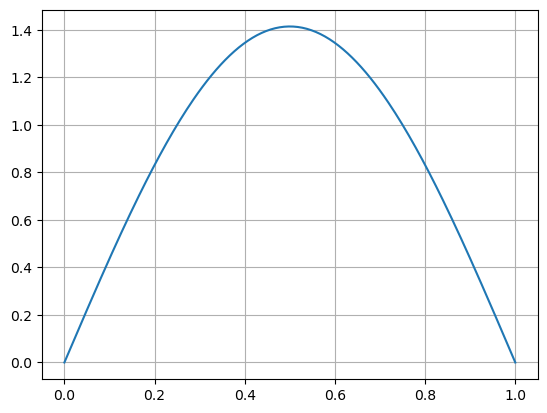

In [136]:
y_pos = ys[:,0]/norm**0.5

plt.plot(xs,y_pos)
plt.grid();

# Schrodinger Eqn

In [195]:
# The following is standard RK4. It calls a function f(x,y,k) where k is a paramter
def rk4(f, x, y, k,h):    
    k1 = h * f(x, y,k)
    k2 = h * f(x + h / 2, y + k1 / 2,k)
    k3 = h * f(x + h / 2, y + k2 / 2,k)
    k4 = h * f(x + h, y + k3,k)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def call_rk4(f,xlim,yini,k,N):
    
    y = yini
    x1,x2 = xlim
    xs,h = np.linspace(x1,x2,N,retstep=True)
    ys = np.zeros((N,len(yini)),dtype = np.float64)
    
    for i in range(N):
        x= xs[i]
        ys[i,:] = y
        
        y = rk4(f,x,y,k,h)             # for a given k value it gives xs and ys 
    return xs , ys


###################################################################################
##          START 
###################################################################################


def odef2(x,y,E):                            # defining the Schr Eqn into vector form 
    k2 = E - V(x);
    return np.array([y[1], -k2 * y[0]])        # here y[1] we just guess



# The potential
def V(x):
    if abs(x)>Lo:
        return 0.0
    else:
        return -Vo*(Lo - x)/2

    
# lets calculate the deviation from both approavhes it should go to zero 

def dev2(E,f2,y_bound):
    y_ini_left = (y_bound[0] , 0.02)  # here 0.02 is guess
    
    xs_left , ys_left = call_rk4(odef2,xlim,y_ini_left,E,N)      # finding xs ys from left side integration
    
    a = abs(xs_left + Lo)
    # find solution at x = Lo (left turning point)
    n1=np.where(a == np.min(a))[0][0]
    
    
    #########################
    
    y_ini_right = (y_bound[1] , 0.02)  # here 0.02 is guess
    
    xs_right , ys_right = call_rk4(odef2,xlim[-1::-1],y_ini_right,E,N)      # finding  ys from right side integration so reverse
    
    b = abs(xs_right + Lo)
    # find solution at x = Lo (left turning point)
    n2=np.where(b == np.min(b))[0][0]
    
    # lets do the scaling now  so that everything is of same order
    
    scale = ys_left[n1][0]/ys_right[n2][0]
    
    ys_right = ys_right * scale
    
    return ys_left[n1][1] - ys_right[n2][1]   # deviation of derivatives at turinng point



In [196]:
Vo= 40.0
Lo = 1.
xlim = [-3. , 3.]
y_bound = [0.0,0.0]
yini = [y_bound[0], 0.01] # 0.1 is an arbitrary number
N = 129
max_iter = 50
tol = 1.0e-5

In [197]:
Es = np.linspace(-Vo , 0 , 1000)
devs2 = [dev2(i,odef2,y_bound) for i in Es]

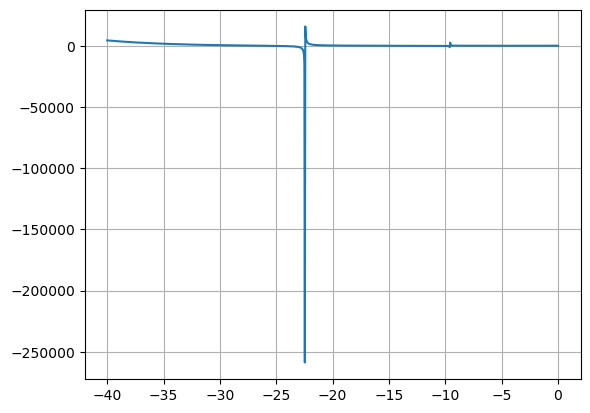

In [198]:
plt.plot(Es,devs2)
plt.grid();

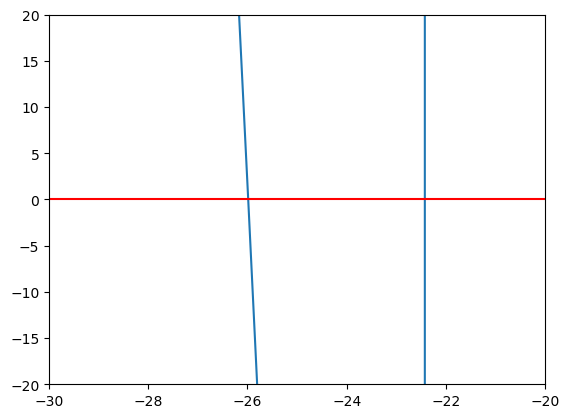

In [199]:
plt.plot(Es,devs2)
plt.ylim([-20.,20.])
plt.xlim([-30.0,-20.0])
plt.axhline(0,c='r')

In [203]:
E_guess = [-25.,-27.]

iter,E_eigen = secant(E_guess,odef2,dev2,y_bound)             # lets find the k that lies between 

print("\n 1st E eigen value is ",E_eigen)


1 -27.0 -26.054482627103685 7.522433067302529
2 -26.054482627103685 -25.983561560543084 -0.22660090830459012
3 -25.983561560543084 -25.98563546783929 0.0009344793092509462
4 -25.98563546783929 -25.985626950379753 1.2019813766528387e-07

 1st E eigen value is  -25.985626950379753


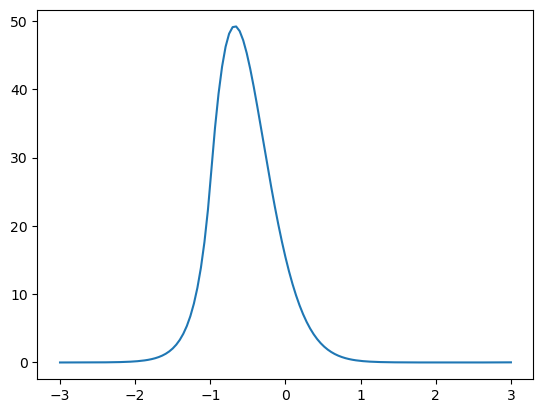

In [206]:
xs_final , ys_final = call_rk4(odef2,xlim,yini,E_eigen,N)
plt.plot(xs_final,ys_final[:,0])

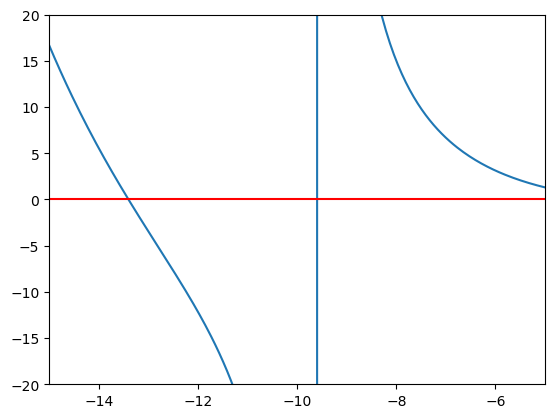

In [209]:
plt.plot(Es,devs2)
plt.ylim([-20.,20.])
plt.xlim([-15.0,-5.0])
plt.axhline(0,c='r')

In [210]:
E_guess = [-14.,-13.]

iter,E_eigen = secant(E_guess,odef2,dev2,y_bound)             # lets find the k that lies between 

print("\n 1st E eigen value is ",E_eigen)

1 -13.0 -13.382276878583863 -0.15149418754778843
2 -13.382276878583863 -13.399868539778648 0.0033203079699184457
3 -13.399868539778648 -13.399491251252313 -3.840844804869903e-06

 1st E eigen value is  -13.399491251252313


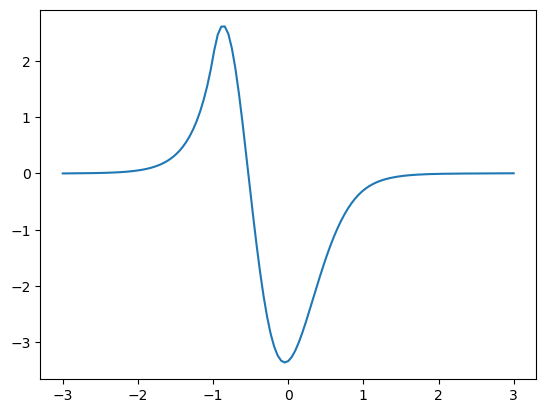

In [211]:
xs_final , ys_final = call_rk4(odef2,xlim,yini,E_eigen,N)
plt.plot(xs_final,ys_final[:,0])